In [2]:
import pandas as pd

In [3]:
arq_vector = ["2021-02-gasolina-etanol.csv", "2021-03-gasolina-etanol.csv", "2021-04-gasolina-etanol.csv", "2021-05-gasolina-etanol.csv", "2021-06-gasolina-etanol.csv", "2021-07-gasolina-etanol.csv"]

In [4]:
def max_state_price_2021():
    """
    Highest oil price per State
    """
    frames = []

    for i in arq_vector:
        frames.append(pd.read_csv(i, sep=';'))
    
    data = pd.concat(frames)
    data = data.loc[data['Produto'] == 'GASOLINA']
    states = sorted(set(data['Estado - Sigla']))
    results = {}

    for x in states:
        
        aux = data.loc[data['Estado - Sigla'] == x]

        results[x] = aux['Valor de Venda'].apply(lambda x: str(x).replace(',', '.')).max()
        
    return results
print(max_state_price_2021())

{'AC': '6.99', 'AL': '6.599', 'AM': '6.05', 'AP': '5.7', 'BA': '6.499', 'CE': '6.35', 'DF': '6.299', 'ES': '6.905', 'GO': '6.65', 'MA': '6.23', 'MG': '6.997', 'MS': '6.33', 'MT': '6.537', 'PA': '6.659', 'PB': '5.93', 'PE': '6.429', 'PI': '6.499', 'PR': '6.35', 'RJ': '6.96', 'RN': '6.499', 'RO': '6.34', 'RR': '5.65', 'RS': '6.999', 'SC': '6.139', 'SE': '5.999', 'SP': '6.499', 'TO': '6.23'}


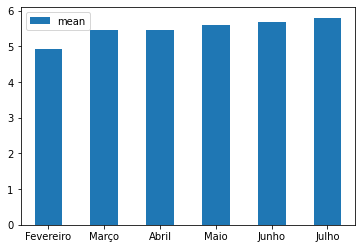

In [5]:
def oil_mean_price_month():
    """
    Graphc Bar of oil mean price per month
    """
    mean_vector = []
    month = ["Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho"]
    
    for i in arq_vector:
        df = pd.read_csv(i, sep=';')
        data_month = df.loc[df['Produto'] == 'GASOLINA']
        aux = data_month['Valor de Venda'].apply(lambda x: str(x).replace(',', '.')).astype('float64')
        mean_vector.append(aux.mean())
    
    df = pd.DataFrame({'month': month,
                      'mean': mean_vector}, index=month)
    df.plot.bar(rot=0)
    
    
    
oil_mean_price_month()

In [32]:
def ethenol_oil_efficiency():
    """
    Look for cities where ethanol is more useful than oil
    """
    cities = []
    df = pd.read_csv("2021-04-gasolina-etanol.csv", sep=';')
    data_eth = df.loc[df['Produto'] == 'ETANOL']
    data_oil = df.loc[df['Produto'] == 'GASOLINA']
    number = set(df['Município'])
    
    for w in number:
        oil_price = data_oil.loc[data_oil['Município'] == w]['Valor de Venda'].apply(lambda x: str(x).replace(',', '.')).astype('float64').min()
        
        eth_price = data_eth.loc[data_eth['Município'] == w]['Valor de Venda'].apply(lambda x: str(x).replace(',', '.')).astype('float64').min()
        
        if eth_price / oil_price < 0.7:
            cities.append(w)
    return cities
print(ethenol_oil_efficiency())

['HORTOLANDIA', 'BEBEDOURO', 'GUARULHOS', 'CASTRO', 'MOGI DAS CRUZES', 'SORRISO', 'SANTO ANDRE', 'SAO JOSE DO RIO PRETO', 'JAU', 'CONTAGEM', 'VARZEA GRANDE', 'RIBEIRAO PIRES', 'SAO CAETANO DO SUL', 'ARACATUBA', 'INDAIATUBA', 'BARUERI', 'JUNDIAI', 'SAO JOSE DOS PINHAIS', "SANTA BARBARA D'OESTE", 'CARAPICUIBA', 'COSMOPOLIS', 'ASSIS', 'SAO PAULO', 'JACAREI', 'VARZEA PAULISTA', 'ARARAQUARA', 'ITATIBA', 'SETE LAGOAS', 'MONTE CARMELO', 'GUARATINGUETA', 'MAUA', 'BAURU', 'ARARAS', 'CAMPINAS', 'OSASCO', 'CUIABA', 'SINOP', 'RIBEIRAO PRETO', 'BELO HORIZONTE', 'VOTORANTIM', 'ITUIUTABA', 'CURITIBA', 'PIRASSUNUNGA', 'COTIA', 'TAUBATE', 'UBERLANDIA', 'VINHEDO', 'ITAPECERICA DA SERRA', 'RONDONOPOLIS', 'EMBU DAS ARTES', 'ANAPOLIS', 'UBERABA', 'MARINGA', 'BARRETOS', 'VALINHOS', 'MONTES CLAROS', 'AMERICANA', 'SOROCABA', 'DIADEMA', 'SUMARE', 'ARAGUARI', 'BETIM', 'AVARE', 'CACAPAVA', 'SAO CARLOS', 'CONSELHEIRO LAFAIETE', 'JOAO PINHEIRO', 'PAULINIA', 'SAO BERNARDO DO CAMPO', 'FRUTAL', 'RIO CLARO', 'BIRIGUI'